# Một số vấn đề khi xử lý Tiếng Việt so sánh với Tiếng Anh

| Khía cạnh | Tiếng Việt | Tiếng Anh |
|-----------|------------|-----------|
| Hệ thống chữ viết | Sử dụng bảng chữ cái Latinh với **dấu thanh và dấu phụ** (6 thanh, ví dụ: à, á, ả). | Dùng bảng chữ cái Latinh **không có dấu phụ**, trừ một số ngoại lệ (ví dụ: café).|
| Phân tách từ `(Tokenization)` | Phức tạp do **không có khoảng trống giữa các từ** (ví dụ: "điện thoại" = 2 âm tiết). | Đơn giản vì từ được phân cách bằng **khoảng trống** (ví dụ: "smartphone" = 1 từ). |
| Tài nguyên NLP | **Hạn chế** về dữ liệu, công cụ tiền xử lý, và mô hình pre-trained. | **Phong phú** (ví dụ: BERT, GPT, corpus lớn như Wikipedia). |
| Xử lý ngữ nghĩa | **Phụ thuộc nhiều vào ngữ cảnh** do thiếu biến tố (ví dụ: "anh ăn" có thể là quá khứ/hiện tại). | Ít phụ thuộc ngữ cảnh hơn nhờ **dấu hiệu hình thái** (ví dụ: "ate" →  quá khứ) |

# Quy trình xử lý Tiếng Việt trong NLP

## 1. Tiền xử lý văn bản
Là bước cực kỳ quan trọng vì tính phức tạp khi làm việc với Tiếng Việt

Một số bước để xử lý:

- Phân tách từ `(Tokenization)`: Chia văn bản thành các đơn vị nhỏ hơn như từ hoặc câu.
- Loại bỏ chữ in hoa, dấu câu và một số từ ghép nối như (`"và"`,`"bởi"`,`"các"`,...)
    - Lưu ý: Bỏ `dấu câu` chứ không phải bỏ dấu từ, vì tiếng việt có rất nhiều từ nếu bỏ dấu sẽ cho ra nghĩa hoàn toàn khác.
    - VD: `súng` bỏ dấu sắc thành `sung`, 2 từ này có ý nghĩa khác hẳn nhau.

## 2. Trích xuất đặc trưng
Sau khi làm sạch văn bản, ta cần chuyển đổi nội dung thành dạng máy tính có thể xử lý được.

- `Word Embedding`: Biểu diễn từ dưới dạng vector số để máy tính có thể làm việc hiệu quả.
    - Word2Vec: Xử lý từ thành vector, mỗi từ thành một vector nhất định.
    - PhoBERT: Không xử lý trực tiếp từ thành vector như Word2Vec mà phân tách các từ thành các thành phần nhỏ hơn bằng thuật toán `SentencePiece (BPE – Byte Pair Encoding)`
  


# Về PhoBERT
- PhoBERT là một mô hình `BERT (Bidirectional Encoder Representations from Transformers)` được huấn luyện riêng cho tiếng Việt, dựa trên RoBERTa. PhoBERT được phát triển bởi VinAI.

- Không xử lý trực tiếp từ thành vector như Word2Vec mà phân tách các từ thành các thành phần nhỏ hơn bằng thuật toán `SentencePiece (BPE – Byte Pair Encoding)`

- Đây là một trong các mô hình xử lý Tiếng Việt tốt nhất hiện nay.

## Cách thức hoạt động của mô hình PhoBERT

#### 1. **Tokenization** (Phân tách từ thành subword)
Sử dụng `BPE - Byte Pair Encoding` để tách văn bản thành các `subword`, thu được `token`

#### 2. **Word Embedding**
Ánh xạ `token` thành `ID`: Vector hóa kết quả thu được từ bước trên

#### 3. **Contextualization (Ngữ cảnh hóa)**
Các vector embedding (`ID` ở bước trên) đi qua nhiều lớp `Transformer` để tạo ra các vector có ngữ cảnh.
- Ví dụ:
  - `"Tôi thích học tập"` → Embedding của `"học"` và `"tập"` sẽ có ý nghĩa liên quan đến việc học.
  - `"Tôi đang tập thể dục"` → Embedding của `"tập"` sẽ có ý nghĩa khác.
#### 4. Output Representation (Kết quả đầu ra)
PhoBERT có thể trích xuất embeddings từ bất kỳ lớp nào, nhưng thường dùng `last hidden layer` hoặc `pooled output`.


# SentencePiece (BPE – Byte Pair Encoding)

- Là một thuật toán nén và phân tách từ, được sử dụng rộng rãi trong NLP, trong các mô hình như GPT, BERT, PhoBERT
- Chia nhỏ từ thành các `subword`, giúp mô hình học tốt hơn với các từ chưa xuất hiện (OOV - Out of Vocabulary)

## Cách thức hoạt động

Cụ thể quy trình hoạt động: (Lấy ví dụ với 2 từ `"kiểm định"` và `"nhân quả"`)
- Tạo ra 1 từ điển chứa toàn bộ kí tự đơn lẻ và kí tự `</w> - là ký tự đánh dấu kết thúc từ `.
    - `vocabulary` = `{"k", "i", "ể", "m", "đ", "ị", "n", "h", "â", "q", "u", "ả", "</w>"}`
- Tách văn bản thành các ký tự riêng lẻ và đưa về trong 1 dãy
    - `"kiểm định"` -> `["k","i","ể","m","</w>","đ","ị","n","h","</w>"]`
    - `"nhân quả"` -> `["n","h","â","n","</w>","q","u","ả","</w>"]`
- Đếm tần suất các cặp ký tự ở liền kề nhau:
    - `("k", "i")`: 1
    - `("i", "ể")`: 1
    - ...
- Hợp nhất cặp từ phổ biến nhất và cập nhật
    - Ở bước trên, ta tìm được cặp từ phổ biến nhất là `("n","h")` xuất hiện 2 lần
    - Gộp 2 từ trên thành `"nh"` và thêm vào `vocabulary`
    - Cập nhật bước `tách văn bản` với từ điển mới.
        - Từ điển sau khi cập nhật: `{"k", "i", "ể", "m", "đ", "ị", "n", "h", "â", "q", "u", "ả", "</w>", "nh"}`
        - Cập nhật tách văn bản:
            - `"kiểm định"` -> `["k","i","ể","m","</w>","đ","ị","nh","</w>"]`
            - `"nhân quả"` -> `["nh","â","n","</w>","q","u","ả","</w>"]`
- Lặp lại quá trình cho đến khi đạt số `subword` cần thiết hoặc không còn cặp nào để hợp nhất

## 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
data = {
    "COMMENT":[
        "Tôi có chút chuyện không vui",
        "Tôi không biết nữa",
        "Tôi bị lệch 50-50",
        "Trường ăn quỵt tôi 100 nghìn",
        "Hôm nay tôi được điểm cao",
        "Tư thế tiếp đất ngầu đó anh bạn à",
        "Hôm nay là một ngày tồi tệ, mọi thứ đều không suôn sẻ",
        "Tôi cảm thấy trống rỗng",
        "Ngày hôm nay thật là nhàm chán",
        "Tôi rất hạnh phúc khi được ăn xiên bẩn"
    ],
    "MOOD":[
        "Buồn",
        "Trung tính",
        "Buồn",
        "Buồn",
        "Vui",
        "Trung tính",
        "Buồn",
        "Buồn",
        "Trung tính",
        "Vui"
    ]
}
df = pd.DataFrame(data)
df

,COMMENT,MOOD
0,Tôi có chút chuyện không vui,Buồn
1,Tôi không biết nữa,Trung tính
2,Tôi bị lệch 50-50,Buồn
3,Trường ăn quỵt tôi 100 nghìn,Buồn
4,Hôm nay tôi được điểm cao,Vui
5,Tư thế tiếp đất ngầu đó anh bạn à,Trung tính
6,"Hôm nay là một ngày tồi tệ, mọi thứ đều không ...",Buồn
7,Tôi cảm thấy trống rỗng,Buồn
8,Ngày hôm nay thật là nhàm chán,Trung tính
9,Tôi rất hạnh phúc khi được ăn xiên bẩn,Vui


In [3]:
label_mapping = {"Buồn": 0, "Trung tính": 1, "Vui": 2}
df['MOOD'] = df['MOOD'].map(label_mapping)
X = df["COMMENT"]
y = df["MOOD"]
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)
print(y_test)

4    2
1    1
3    0
Name: MOOD, dtype: int64


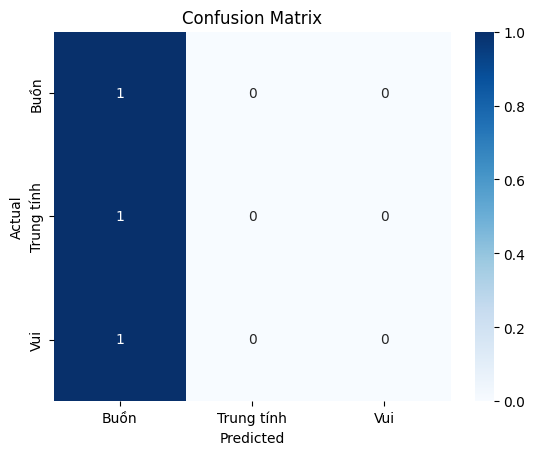

              precision    recall  f1-score   support

        Buồn       0.33      1.00      0.50         1
  Trung tính       0.00      0.00      0.00         1
         Vui       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



C:\Users\Tu\anaconda3\envs\VV\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tu\anaconda3\envs\VV\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tu\anaconda3\envs\VV\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
#Thử nghiệm với mô hình Logistic Regression

# Chuyển đổi văn bản thành đặc trưng số sử dụng TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Huấn luyện mô hình Logistic Regression
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_vec)

# In ra confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Buồn', 'Trung tính', 'Vui'], yticklabels=['Buồn', 'Trung tính', 'Vui'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# In ra báo cáo phân loại
print(classification_report(y_test, y_pred, target_names=['Buồn', 'Trung tính', 'Vui']))

C:\Users\Tu\anaconda3\envs\VV\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Tu\anaconda3\envs\VV\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
C:\Users\Tu\AppData\Local\Temp\ipykernel_22232\2592131283.py:20

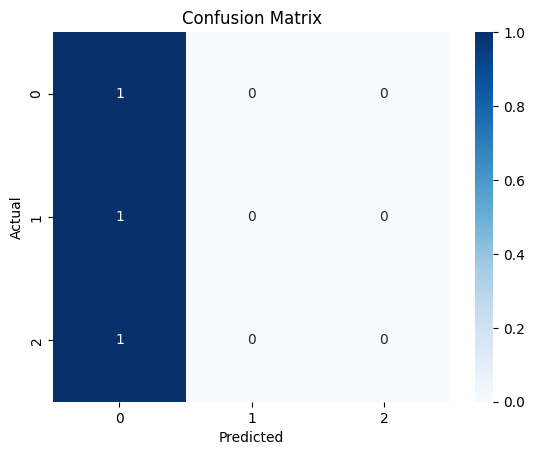

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



C:\Users\Tu\anaconda3\envs\VV\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tu\anaconda3\envs\VV\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tu\anaconda3\envs\VV\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
#Thử nghiệm nhỏ với PhoBERT
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "vinai/phobert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Tokenize dữ liệu
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128, return_tensors="pt")
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=128, return_tensors="pt")

# Tạo dataset từ dữ liệu đã tokenize
class MoodDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = MoodDataset(train_encodings, y_train.tolist())
test_dataset = MoodDataset(test_encodings, y_test.tolist())

# Huấn luyện mô hình
from torch.utils.data import DataLoader
from transformers import AdamW

# Thiết lập DataLoader
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Thiết lập optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Huấn luyện
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)

model.train()
for epoch in range(3):  # Số epoch
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Đánh giá mô hình
model.eval()
y_pred = []
with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        y_pred.extend(torch.argmax(logits, dim=1).cpu().numpy())

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))